# Clean and transform the data

**Analyse the given dataset completely and perform the following questions.**
1. Convert the text based categorical columns to numeric columns
2. Convert the Order Date column into Day, Month, Year and Time columns separately
3. Create a new column and store the Price data as rounded off in integer format
4. Create a new column and store the PIN Codes from the Address column
5. Is there any pattern in the Order ID? If yes, find it.
6. Create a new column named City and store the city names from the Address column
7. Group Product column into different categories such as Phones, Accessories, etc according to the data available.
8. Create 12 separate date ordered dataframes for every month.

 **Analyse the given dataset completely and answer the following questions.**
1. What was the best month for sales? How much was earned that month? Explain via graph/chart
2. What city sold the most product?
3. What time should we display advertisements to maximize likelihood of customer's buying product?
4. Which product was sold the least as per your categories and what might be the reason behind that. Explain your analysis.
5. Which product is most likely to be sold more during winter season, summer season  and rainy season? Explain the possible reason behind the High-Volume Sale
6. Which phone is sold most during the month of March?
7. Which headphones are the most expensive?
8. Check if the price of any product is changing in different months. If yes, explain the possible reason behind the price change
9. People prefer which product more in earphones, wired or wireless?
10. Which product in every category in more likely to be ordered in bulk

In [3]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read the dataset
df=pd.read_csv('/content/SalesAnalysis.csv')

In [5]:
#Print top 20 rows
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [6]:
#Checking for shape
df.shape

(186850, 6)

In [7]:
#Checking for column
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
#Checking for information of each column like data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
#Checkikng Null Values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In above cell we see that in every column that there is 545 missing values in the data

In [10]:
#Remove rows that contain null value
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

From above cell we that after dropping the rows with null values there is no missing value in each column

In [12]:
#Check For Duplicates
df.duplicated().sum()

618

From above cell, We see that in our DataFrame there is 618 duplicate rows

In [13]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In above cell we drop duplicate row

In [14]:
df.duplicated().sum()

0

Again we check if there is still duplicate row hence we can see that there is duplicate value

In [15]:
df.shape

(185687, 6)

# Analyse the given dataset completely and perform the following questions.

# Q1. Convert the text based categorical columns to numeric columns

In [16]:
#Convert columns object to numeric
df['Order ID']=pd.to_numeric(df['Order ID'],errors='coerce')
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],errors='coerce')
df['Price Each']=pd.to_numeric(df['Price Each'],errors='coerce')
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')


In [17]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  float64       
 1   Product           185687 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185687 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.9+ MB


Here we can see that the data type of columns is changed to numerical and date time fromat

In [19]:
df.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Q2-Convert the Order Date column into Day, Month, Year and Time columns separately

In [22]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [23]:
#Create New Column year,month,day,time
df['Order_year']=df['Order Date'].dt.year
df['Order_month']=df['Order Date'].dt.month
df['Order_day']=df['Order Date'].dt.day
df['Order_time']=df['Order Date'].dt.time

In [24]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00
...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00


# Q3- Create a new column and store the Price data as rounded off in integer format

In [25]:
#Create New column of `Price Each` that contain price rounded off integer value
df['product_price']=df['Price Each'].astype(int)

In [26]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379


# Q4-Create a new column and store the PIN Codes from the Address column

In [27]:
#Create New column from 'Purchase Address' Pincode that contain pincode of each city
df['Pincode']=df['Purchase Address'].str[-5:]

In [28]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016


# Q5- Is there any pattern in the Order ID? If yes, find it.

In [29]:
df['Order ID']=df['Order ID'].astype(int)

In [30]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016


In [31]:
df['Order ID'].head(100)

0      176558
2      176559
3      176560
4      176560
5      176561
        ...  
97     176650
98     176651
99     176652
100    176653
101    176654
Name: Order ID, Length: 100, dtype: int64

From above cell we see that order id is a series that is start from 176558 and end at 259357 and the stepsize is 1 .
hence we can say that the 'OrderID' column does not follow any type of pattern

# Q-6 Create a new column named City and store the city names from the Address column

In [32]:
df['Purchase Address']

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185686, dtype: object

In [33]:
split_df = df['Purchase Address'].str.split(',', n=3,expand=True)
split_df

,0,1,2
0,917 1st St,Dallas,TX 75001
2,682 Chestnut St,Boston,MA 02215
3,669 Spruce St,Los Angeles,CA 90001
4,669 Spruce St,Los Angeles,CA 90001
5,333 8th St,Los Angeles,CA 90001
...,...,...,...
186845,840 Highland St,Los Angeles,CA 90001
186846,216 Dogwood St,San Francisco,CA 94016
186847,220 12th St,San Francisco,CA 94016
186848,511 Forest St,San Francisco,CA 94016


In [34]:
split_df.rename(columns={1:'City'},inplace=True)

In [35]:
split_df['City']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: City, Length: 185686, dtype: object

In [36]:
df=pd.concat([df,split_df['City']],axis=1)

In [37]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001,Los Angeles
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016,San Francisco


# Q7-Group Product column into different categories such as Phones, Accessories, etc according to the data available.

In [38]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001,Los Angeles
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016,San Francisco


In [39]:
df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [40]:
patterns = {
    'Phones': r'Phone',
    'Accessories': r'Cable|Headphones|Batteries',
    'Monitors': r'Monitor',
    'Laptop':r'Laptop',


}

# Function to categorize products based on patterns
def categorize_product(product):
    for category, pattern in patterns.items():
        if pd.notnull(product) and pd.notnull(pattern) and pd.Series(product).str.contains(pattern, case=False, regex=True).any():
            return category
    return 'Other'

# Create a new column 'Category' based on 'Product' column
df['Category'] = df['Product'].apply(categorize_product)


In [41]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City,Category
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001,Dallas,Accessories
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston,Phones
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phones
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001,Los Angeles,Phones
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001,Los Angeles,Phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001,Los Angeles,Accessories
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco,Phones
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco,Phones
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016,San Francisco,Monitors


In [42]:
df['Category'].unique()

array(['Accessories', 'Phones', 'Laptop', 'Monitors', 'Other'],
      dtype=object)

In [43]:
df[df['Category']=='Other']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City,Category
29,176584,Flatscreen TV,1.0,300.0,2019-04-24 20:39:00,"936 Church St, San Francisco, CA 94016",2019,4,24,20:39:00,300,94016,San Francisco,Other
53,176606,LG Dryer,1.0,600.0,2019-04-21 14:16:00,"487 Maple St, San Francisco, CA 94016",2019,4,21,14:16:00,600,94016,San Francisco,Other
66,176619,Flatscreen TV,1.0,300.0,2019-04-16 18:37:00,"116 North St, Los Angeles, CA 90001",2019,4,16,18:37:00,300,90001,Los Angeles,Other
99,176652,LG Washing Machine,1.0,600.0,2019-04-09 20:04:00,"502 14th St, New York City, NY 10001",2019,4,9,20:04:00,600,10001,New York City,Other
124,176676,LG Dryer,1.0,600.0,2019-04-09 00:35:00,"788 Lincoln St, Los Angeles, CA 90001",2019,4,9,00:35:00,600,90001,Los Angeles,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186551,259076,Flatscreen TV,1.0,300.0,2019-09-23 14:22:00,"177 Sunset St, Boston, MA 02215",2019,9,23,14:22:00,300,02215,Boston,Other
186618,259139,Flatscreen TV,1.0,300.0,2019-09-24 18:32:00,"663 North St, New York City, NY 10001",2019,9,24,18:32:00,300,10001,New York City,Other
186712,259230,Flatscreen TV,1.0,300.0,2019-09-21 19:36:00,"344 6th St, Seattle, WA 98101",2019,9,21,19:36:00,300,98101,Seattle,Other
186755,259271,Flatscreen TV,1.0,300.0,2019-09-15 06:03:00,"453 Hill St, Seattle, WA 98101",2019,9,15,06:03:00,300,98101,Seattle,Other


# Q8-Create 12 separate date ordered dataframes for every month.

In [44]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City,Category
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001,Dallas,Accessories
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston,Phones
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phones
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001,Los Angeles,Phones
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001,Los Angeles,Phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001,Los Angeles,Accessories
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco,Phones
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco,Phones
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016,San Francisco,Monitors


In [45]:
january_df=df[df['Order_month']==1].sort_values(by='Order Date')
february_df=df[df['Order_month']==2].sort_values(by='Order Date')
march_df=df[df['Order_month']==3].sort_values(by='Order Date')
april_df=df[df['Order_month']==4].sort_values(by='Order Date')
may_df=df[df['Order_month']==5].sort_values(by='Order Date')
june_df=df[df['Order_month']==6].sort_values(by='Order Date')
july_df=df[df['Order_month']==7].sort_values(by='Order Date')
august_df=df[df['Order_month']==8].sort_values(by='Order Date')
september_df=df[df['Order_month']==9].sort_values(by='Order Date')
october_df=df[df['Order_month']==10].sort_values(by='Order Date')
nomember_df=df[df['Order_month']==11].sort_values(by='Order Date')
december_df=df[df['Order_month']==12].sort_values(by='Order Date')


# Analyse the given dataset completely and answer the following questions.

## What was the best month for sales? How much was earned that month? Explain via graph/chart

In [46]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City,Category
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001,Dallas,Accessories
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston,Phones
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phones
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001,Los Angeles,Phones
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001,Los Angeles,Phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001,Los Angeles,Accessories
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco,Phones
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco,Phones
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016,San Francisco,Monitors


In [47]:
best_month=df.groupby('Order_month')[['Price Each']].sum()

In [48]:
best_month

,Price Each
Order_month,
1,1810924.81
2,2186940.38
3,2789084.64
4,3366218.76
5,3133134.61
6,2560503.50
7,2631225.12
8,2226963.90
9,2081897.65


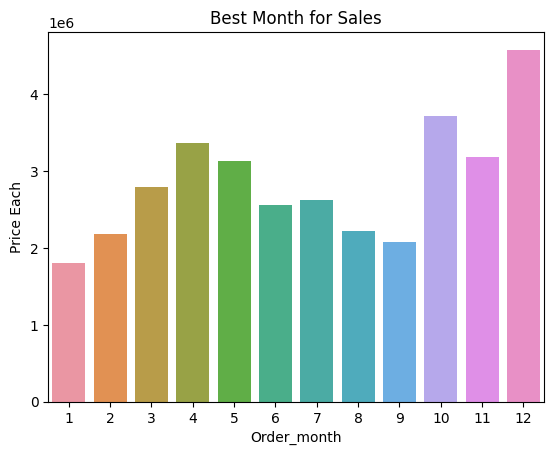

In [49]:
sns.barplot(x=best_month.index,y=best_month['Price Each'])
plt.title("Best Month for Sales")
plt.show()

from above Bar plot we see that the 12(december) month was the best month for sales. The earning from the 12(december) month is 4583267.77

# What city sold the most product?

In [50]:
city_prod=df['City'].value_counts()

In [51]:
city_prod

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

From above cell we see that 'San Francisco' has largest number of value counts. Hence we can say that 'San Francisco' sold the most Product.

## Q-3 What time should we display advertisements to maximize likelihood of customer's buying product?

In [52]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City,Category
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001,Dallas,Accessories
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston,Phones
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phones
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001,Los Angeles,Phones
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001,Los Angeles,Phones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001,Los Angeles,Accessories
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco,Phones
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco,Phones
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016,San Francisco,Monitors


In [53]:
#Create New Column that contain hour
df['Order_hour']=df['Order Date'].dt.hour


In [54]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City,Category,Order_hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001,Dallas,Accessories,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston,Phones,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phones,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001,Los Angeles,Phones,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001,Los Angeles,Phones,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001,Los Angeles,Accessories,20
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco,Phones,16
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco,Phones,7
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016,San Francisco,Monitors,17


In [55]:
hourly_orders =pd.DataFrame(df.groupby(['Order_hour']).size())

In [56]:
hourly_orders

,0
Order_hour,
0,3902
1,2347
2,1242
3,830
4,852
5,1320
6,2481
7,4002
8,6252


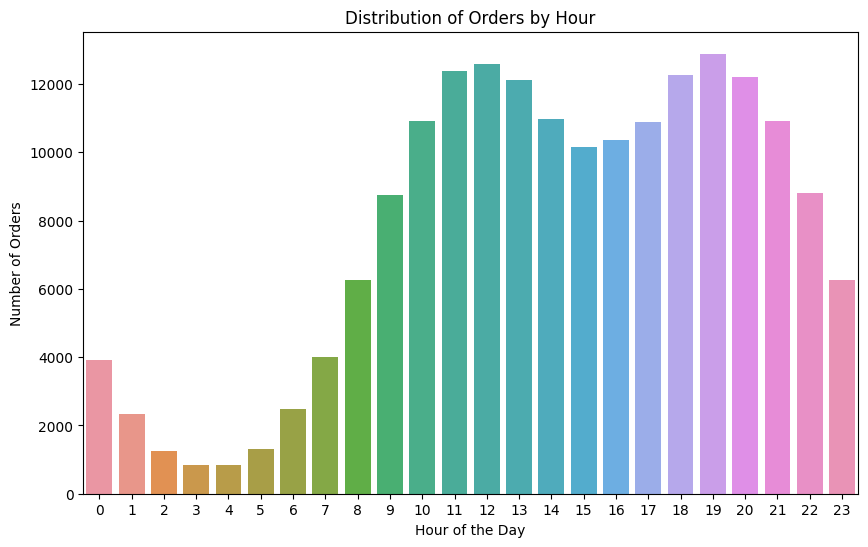

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_orders.index,y=0,data=hourly_orders)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour')
plt.xticks(range(24))

plt.show()

From above bar plot we see that the 19th hour has the highest number of orderes .Hence that  time should we display advertisements to maximize likelihood of customer's buying product.

# Which product was sold the least as per your categories and what might be the reason behind that. Explain your analysis.

In [58]:
df.groupby('Category')[['Product']].value_counts().sort_values().head(1)

Category  Product 
Other     LG Dryer    646
dtype: int64

From above cell we see that the other category product 'LG Dryer ' has least sold.

# Which product is most likely to be sold more during winter season, summer season and rainy season? Explain the possible reason behind the High-Volume Sale

In [59]:
def season(month):
    if month>2 and month<6:
        return 'Spring'
    elif month>5 and month<9:
        return 'Summer'
    elif month>8 and month<12:
        return 'Rainy'
    else:
        return 'Winter'

In [60]:
df['Season']=df['Order_month'].apply(season)

In [61]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City,Category,Order_hour,Season
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001,Dallas,Accessories,8,Spring
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston,Phones,22,Spring
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phones,14,Spring
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001,Los Angeles,Phones,14,Spring
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001,Los Angeles,Phones,9,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20:56:00,2,90001,Los Angeles,Accessories,20,Rainy
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16:00:00,700,94016,San Francisco,Phones,16,Rainy
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,07:39:00,700,94016,San Francisco,Phones,7,Rainy
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17:30:00,379,94016,San Francisco,Monitors,17,Rainy


In [62]:
season_prod=pd.DataFrame(df.groupby('Season')['Product'].value_counts().sort_values(ascending=False))

In [63]:
pd.set_option('display.max_rows',None)

In [64]:
season_prod

,,Product
Season,Product,
Rainy,USB-C Charging Cable,5942
Spring,Lightning Charging Cable,5875
Rainy,Lightning Charging Cable,5782
Spring,USB-C Charging Cable,5719
Winter,USB-C Charging Cable,5661
Spring,AA Batteries (4-pack),5555
Rainy,AA Batteries (4-pack),5524
Spring,AAA Batteries (4-pack),5521
Rainy,AAA Batteries (4-pack),5514


From above analysis we can say that in winter season 'USB-C Charging Cable' is the most sold product and in Summer Season 'Lightning Charging Cable' is the most sold product and in Rainy Season 'USB-C Charging Cable' is the most sold product.

# Which phone is sold most during the month of March?

In [65]:
March_df=df[df['Order_month']==3]

In [66]:
March_df[March_df['Category']=='Phones']['Product'].value_counts().head(1)

Wired Headphones    1512
Name: Product, dtype: int64

From above cell we can say that 'Wired Headphones' is the most sold product during March.

# Which headphones are the most expensive?

In [87]:
Phones_df=df[df['Category']=='Phones']

In [88]:
Phones_df.sort_values(by='Price Each',ascending=False)

In [89]:
Phones_df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City,Category,Order_hour,Season
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston,Phones,22,Spring


From above cell we see that 'Bose SoundSport Headphones' is the most expensive Headphones with price $99.

In [90]:
#@title # Check if the price of any product is changing in different months. If yes, explain the possible reason behind the price change




In [91]:
price_variation = df.groupby(['Product', 'Order_month'])['Price Each'].agg(['min', 'max'])


In [92]:
price_variation['price_diff'] = price_variation['max'] - price_variation['min']


In [93]:
price_changed_products = price_variation[price_variation['price_diff'] != 0]


In [94]:
price_changed_products

,,min,max,price_diff
Product,Order_month,,,


From above cells we that there is no change in product price in months.

In [95]:
#@title People prefer which product more in earphones, wired or wireless?


In [96]:
df['Category'].unique()

array(['Accessories', 'Phones', 'Laptop', 'Monitors', 'Other'],
      dtype=object)

In [97]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_year,Order_month,Order_day,Order_time,product_price,Pincode,City,Category,Order_hour,Season
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,08:46:00,11,75001,Dallas,Accessories,8,Spring
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22:30:00,99,02215,Boston,Phones,22,Spring
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,600,90001,Los Angeles,Phones,14,Spring
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14:38:00,11,90001,Los Angeles,Phones,14,Spring
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,09:27:00,11,90001,Los Angeles,Phones,9,Spring
6,176562,USB-C Charging Cable,1.0,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",2019,4,29,13:03:00,11,94016,San Francisco,Accessories,13,Spring
7,176563,Bose SoundSport Headphones,1.0,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",2019,4,2,07:46:00,99,98101,Seattle,Phones,7,Spring
8,176564,USB-C Charging Cable,1.0,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",2019,4,12,10:58:00,11,30301,Atlanta,Accessories,10,Spring
9,176565,Macbook Pro Laptop,1.0,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",2019,4,24,10:38:00,1700,94016,San Francisco,Laptop,10,Spring
10,176566,Wired Headphones,1.0,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",2019,4,8,14:05:00,11,02215,Boston,Phones,14,Spring


In [98]:
earphone_df=df[df['Category']=='Phones']

In [99]:
wired_quantity = earphone_df[earphone_df['Product'].str.contains('Wired')]['Quantity Ordered'].sum()
wireless_quantity = earphone_df[earphone_df['Product'].str.contains('Wireless')]['Quantity Ordered'].sum()

In [100]:
if wired_quantity > wireless_quantity:
    preference = 'Wired earphones'
elif wired_quantity < wireless_quantity:
    preference = 'Wireless earphones'
else:
    preference = 'Equal preference for wired and wireless earphones'


In [101]:
print("People prefer", preference)


People prefer Wired earphones


From cells we see that Mostly people prefered Wired Earphones.

In [102]:
# @title Which product in every category in more likely to be ordered in bulk

In [103]:
bulk_products = df.groupby('Category')['Product', 'Quantity Ordered'].max()


<ipython-input-103-d38e3adb1dc1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bulk_products = df.groupby('Category')['Product', 'Quantity Ordered'].max()


In [104]:
bulk_products_sorted = bulk_products.sort_values(by='Quantity Ordered', ascending=False)


In [105]:
bulk_products_max = bulk_products_sorted.groupby('Category').first()


In [106]:
print(bulk_products_max)


                            Product  Quantity Ordered
Category                                             
Accessories    USB-C Charging Cable               9.0
Laptop              ThinkPad Laptop               2.0
Monitors     34in Ultrawide Monitor               2.0
Other            LG Washing Machine               2.0
Phones                       iPhone               4.0


From above cells we see that :


1.   In **Accessories** category **'USB-C Charging Cable'** product is the more likely to be ordered in bulk.
2.   In **laptop** Category **'ThinkPad Laptop'** product is more likely to be ordered in bulk.
3. In **Monitors** Category **'34in Ultrawide Monitor'** product is more likely to be ordered in bulk.
4. In **Phones** Category **'iphone'** product  is more likely to be ordered in bulk
5. In **others** Category **'LG Washing Machine'** product is more likely to be ordered in bulk.



